In [3]:
from google.colab import files
uploaded = files.upload()

# Then load it
df = pd.read_csv("Titanic-Dataset (1).csv")
df.head()



Saving Titanic-Dataset (1).csv to Titanic-Dataset (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Shape = (rows, columns)
print("Shape of dataset:", df.shape)

# Info about each column (like type and missing values)
print("\n--- Info ---")
print(df.info())

# Basic statistics
print("\n--- Describe ---")
print(df.describe(include='all'))


Shape of dataset: (891, 12)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Describe ---
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN

In [5]:
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])


In [6]:
df['Cabin'] = df['Cabin'].fillna("Unknown")


In [7]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


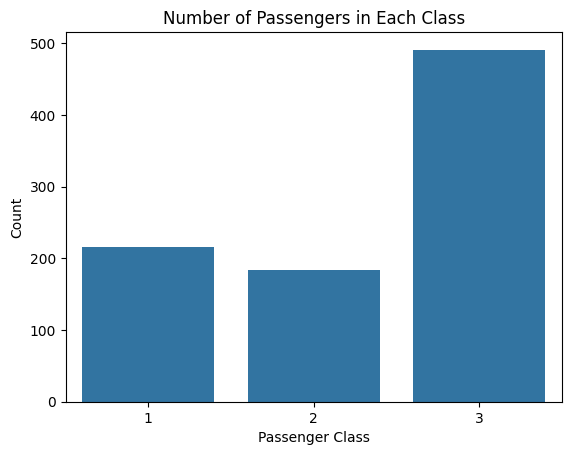

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a countplot of Pclass
sns.countplot(x='Pclass', data=df)
plt.title('Number of Passengers in Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


In [9]:
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print(female_survivors['Name'])


1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
874                Abelson, Mrs. Samuel (Hannah Wizosky)
875                     Najib, Miss. Adele Kiamie "Jane"
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
887                         Graham, Miss. Margaret Edith
Name: Name, Length: 233, dtype: object


In [10]:
young_class3 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print(young_class3[['Name', 'Age', 'Pclass']])


                                        Name   Age  Pclass
7             Palsson, Master. Gosta Leonard   2.0       3
10           Sandstrom, Miss. Marguerite Rut   4.0       3
14      Vestrom, Miss. Hulda Amanda Adolfina  14.0       3
16                      Rice, Master. Eugene   2.0       3
22               McGowan, Miss. Anna "Annie"  15.0       3
..                                       ...   ...     ...
844                      Culumovic, Mr. Jeso  17.0       3
850  Andersson, Master. Sigvard Harald Elias   4.0       3
852                  Boulos, Miss. Nourelain   9.0       3
869          Johnson, Master. Harold Theodor   4.0       3
875         Najib, Miss. Adele Kiamie "Jane"  15.0       3

[78 rows x 3 columns]


In [11]:
older_class1 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print(older_class1[['Name', 'Age', 'Pclass']])


                                                  Name   Age  Pclass
6                              McCarthy, Mr. Timothy J  54.0       1
11                            Bonnell, Miss. Elizabeth  58.0       1
35                      Holverson, Mr. Alexander Oskar  42.0       1
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0       1
54                      Ostby, Mr. Engelhart Cornelius  65.0       1
..                                                 ...   ...     ...
856         Wick, Mrs. George Dennick (Mary Hitchcock)  45.0       1
857                             Daly, Mr. Peter Denis   51.0       1
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  48.0       1
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  47.0       1
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0       1

[76 rows x 3 columns]


In [12]:
survived_older_class1 = older_class1[older_class1['Survived'] == 1]
print(survived_older_class1[['Name', 'Age', 'Survived']])


                                                  Name   Age  Survived
11                            Bonnell, Miss. Elizabeth  58.0         1
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0         1
187      Romaine, Mr. Charles Hallace ("Mr C Rolmane")  45.0         1
194          Brown, Mrs. James Joseph (Margaret Tobin)  44.0         1
195                               Lurette, Miss. Elise  58.0         1
268      Graham, Mrs. William Thompson (Edith Junkins)  58.0         1
275                  Andrews, Miss. Kornelia Theodosia  63.0         1
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  50.0         1
337                    Burns, Miss. Elizabeth Margaret  41.0         1
366   Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  60.0         1
380                              Bidois, Miss. Rosalie  42.0         1
449                     Peuchen, Major. Arthur Godfrey  52.0         1
453                           Goldenberg, Mr. Samuel L  49.0         1
460   

In [13]:
rich_males = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print(rich_males[['Name', 'Sex', 'Fare']])


                                           Name   Sex      Fare
27               Fortune, Mr. Charles Alexander  male  263.0000
118                    Baxter, Mr. Quigg Edmond  male  247.5208
305              Allison, Master. Hudson Trevor  male  151.5500
332                   Graham, Mr. George Edward  male  153.4625
373                         Ringhini, Mr. Sante  male  135.6333
377                   Widener, Mr. Harry Elkins  male  211.5000
390                  Carter, Mr. William Ernest  male  120.0000
438                           Fortune, Mr. Mark  male  263.0000
505  Penasco y Castellana, Mr. Victor de Satode  male  108.9000
527                          Farthing, Mr. John  male  221.7792
544                  Douglas, Mr. Walter Donald  male  106.4250
550                 Thayer, Mr. John Borland Jr  male  110.8833
557                         Robbins, Mr. Victor  male  227.5250
659                  Newell, Mr. Arthur Webster  male  113.2750
660               Frauenthal, Dr. Henry 

In [14]:
rich_males = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print(rich_males[['Name', 'Sex', 'Fare']])


                                           Name   Sex      Fare
27               Fortune, Mr. Charles Alexander  male  263.0000
118                    Baxter, Mr. Quigg Edmond  male  247.5208
305              Allison, Master. Hudson Trevor  male  151.5500
332                   Graham, Mr. George Edward  male  153.4625
373                         Ringhini, Mr. Sante  male  135.6333
377                   Widener, Mr. Harry Elkins  male  211.5000
390                  Carter, Mr. William Ernest  male  120.0000
438                           Fortune, Mr. Mark  male  263.0000
505  Penasco y Castellana, Mr. Victor de Satode  male  108.9000
527                          Farthing, Mr. John  male  221.7792
544                  Douglas, Mr. Walter Donald  male  106.4250
550                 Thayer, Mr. John Borland Jr  male  110.8833
557                         Robbins, Mr. Victor  male  227.5250
659                  Newell, Mr. Arthur Webster  male  113.2750
660               Frauenthal, Dr. Henry 

In [15]:
embarked_c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print(embarked_c_class2[['Name', 'Embarked', 'Pclass']])


                                                  Name Embarked  Pclass
9                  Nasser, Mrs. Nicholas (Adele Achem)        C       2
43            Laroche, Miss. Simonne Marie Anne Andree        C       2
122                               Nasser, Mr. Nicholas        C       2
135                                 Richard, Mr. Emile        C       2
181                                   Pernot, Mr. Rene        C       2
292                             Levy, Mr. Rene Jacques        C       2
308                                Abelson, Mr. Samuel        C       2
361                          del Carlo, Mr. Sebastiano        C       2
389                              Lehmann, Miss. Bertha        C       2
473       Jerwan, Mrs. Amin S (Marie Marthe Thuillard)        C       2
547                         Padro y Manent, Mr. Julian        C       2
608  Laroche, Mrs. Joseph (Juliette Marie Louise La...        C       2
685             Laroche, Mr. Joseph Philippe Lemercier        C 

In [16]:
many_siblings = df[df['SibSp'] > 2]
print(many_siblings[['Name', 'SibSp']])


                                                  Name  SibSp
7                       Palsson, Master. Gosta Leonard      3
16                                Rice, Master. Eugene      4
24                       Palsson, Miss. Torborg Danira      3
27                      Fortune, Mr. Charles Alexander      3
50                          Panula, Master. Juha Niilo      4
59                  Goodwin, Master. William Frederick      5
63                               Skoog, Master. Harald      3
68                     Andersson, Miss. Erna Alexandra      4
71                          Goodwin, Miss. Lillian Amy      5
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...      3
88                          Fortune, Miss. Mabel Helen      3
119                  Andersson, Miss. Ellis Anna Maria      4
159                         Sage, Master. Thomas Henry      8
164                       Panula, Master. Eino Viljami      4
171                               Rice, Master. Arthur      4
176     

In [17]:
alone_and_died = df[
    (df['Survived'] == 0) &
    (df['SibSp'] == 0) &
    (df['Parch'] == 0)
]
print(alone_and_died[['Name', 'Survived', 'SibSp', 'Parch']])


                                     Name  Survived  SibSp  Parch
4                Allen, Mr. William Henry         0      0      0
5                        Moran, Mr. James         0      0      0
6                 McCarthy, Mr. Timothy J         0      0      0
12         Saundercock, Mr. William Henry         0      0      0
14   Vestrom, Miss. Hulda Amanda Adolfina         0      0      0
..                                    ...       ...    ...    ...
882          Dahlberg, Miss. Gerda Ulrika         0      0      0
883         Banfield, Mr. Frederick James         0      0      0
884                Sutehall, Mr. Henry Jr         0      0      0
886                 Montvila, Rev. Juozas         0      0      0
890                   Dooley, Mr. Patrick         0      0      0

[374 rows x 4 columns]


In [18]:
oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print(oldest_survivors[['Name', 'Age', 'Survived']])


                                          Name   Age  Survived
630       Barkworth, Mr. Algernon Henry Wilson  80.0         1
275          Andrews, Miss. Kornelia Theodosia  63.0         1
483                     Turkula, Mrs. (Hedwig)  63.0         1
570                         Harris, Mr. George  62.0         1
829  Stone, Mrs. George Nelson (Martha Evelyn)  62.0         1


In [19]:
free_passengers = df[df['Fare'] == 0]
print(free_passengers[['Name', 'Fare']])


                                 Name  Fare
179               Leonard, Mr. Lionel   0.0
263             Harrison, Mr. William   0.0
271      Tornquist, Mr. William Henry   0.0
277       Parkes, Mr. Francis "Frank"   0.0
302   Johnson, Mr. William Cahoone Jr   0.0
413    Cunningham, Mr. Alfred Fleming   0.0
466             Campbell, Mr. William   0.0
481  Frost, Mr. Anthony Wood "Archie"   0.0
597               Johnson, Mr. Alfred   0.0
633     Parr, Mr. William Henry Marsh   0.0
674        Watson, Mr. Ennis Hastings   0.0
732              Knight, Mr. Robert J   0.0
806            Andrews, Mr. Thomas Jr   0.0
815                  Fry, Mr. Richard   0.0
822   Reuchlin, Jonkheer. John George   0.0


In [20]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Show shapes of both sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)


Training set shape: (712, 12)
Testing set shape: (179, 12)
